In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(1, '../src/')
from config import raw_data_path, univariate_data_path, processed_data_path, models_path, results_path

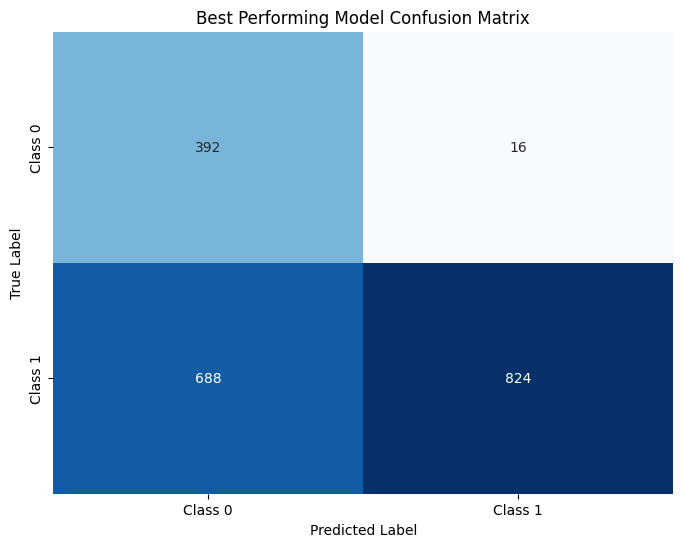

Accuracy:  0.6333
Precision: 0.9810
Recall:    0.5450
F1 Score:  0.7007
AUC:       0.7529
AP:        0.8929


In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
path = os.path.join('..', 'results', 'results_ResNet_all_runs.csv')
# Load CSV
df = pd.read_csv(path)
pred_label = 'best_pred_label'

# Extract true and predicted labels
best_targs = df['target']
pred_labels = df[pred_label]
# Compute confusion matrix
cm = confusion_matrix(best_targs, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Best Performing Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Ensure data is numeric (if loaded as strings)
best_targs = best_targs.astype(int)
pred_labels = pred_labels.astype(int)

# Print classification metrics
accuracy = accuracy_score(best_targs, pred_labels)
precision = precision_score(best_targs, pred_labels)
recall = recall_score(best_targs, pred_labels)
f1 = f1_score(best_targs, pred_labels)

# For AUC and AP, we need probabilities — assuming pred_prob4 exists
if pred_label in df.columns:
    pred_probs = df[pred_label].astype(float)
    auc = roc_auc_score(best_targs, pred_probs)
    ap = average_precision_score(best_targs, pred_probs)
else:
    auc = ap = None  # Or raise an error/warning

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
if auc is not None:
    print(f"AUC:       {auc:.4f}")
    print(f"AP:        {ap:.4f}")
else:
    print("AUC and AP not computed (pred_prob4 not found).")



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("fcmae_resnet_run_losses.csv")

# Group by epoch to compute mean and std
grouped = df.groupby("epoch")

mean_train = grouped["train_loss"].mean()
std_train = grouped["train_loss"].std()

mean_valid = grouped["valid_loss"].mean()
std_valid = grouped["valid_loss"].std()

epochs = mean_train.index.values

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(epochs, mean_train, label='Train Loss')
plt.fill_between(epochs, mean_train - std_train, mean_train + std_train, alpha=0.3)

plt.plot(epochs, mean_valid, label='Test Loss')
plt.fill_between(epochs, mean_valid - std_valid, mean_valid + std_valid, alpha=0.3)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Loss Curves Over Five Runs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'fcmae_resnet_run_losses.csv'

Creates plots for performance over different subsets of data


Summary Statistics by Data Subset:

--- ACCURACY ---
 data_subset     mean      std
          20 0.492604 0.188528
          40 0.634792 0.005342
          60 0.649479 0.017057
          80 0.653958 0.021059
         100 0.633958 0.002481

--- PRECISION ---
 data_subset     mean      std
          20 0.755044 0.423669
          40 0.963914 0.022207
          60 0.943616 0.016999
          80 0.936192 0.019233
         100 0.966544 0.010272

--- RECALL ---
 data_subset     mean      std
          20 0.383995 0.268354
          40 0.557804 0.021813
          60 0.590873 0.034511
          80 0.602513 0.040965
         100 0.554497 0.008202

--- F1 ---
 data_subset     mean      std
          20 0.493099 0.308778
          40 0.706163 0.010831
          60 0.725910 0.021156
          80 0.732125 0.024818
         100 0.704628 0.004203

--- AVERAGE_PRECISION ---
 data_subset     mean      std
          20 0.889437 0.079083
          40 0.924241 0.003416
          60 0.909121 0.044950
    

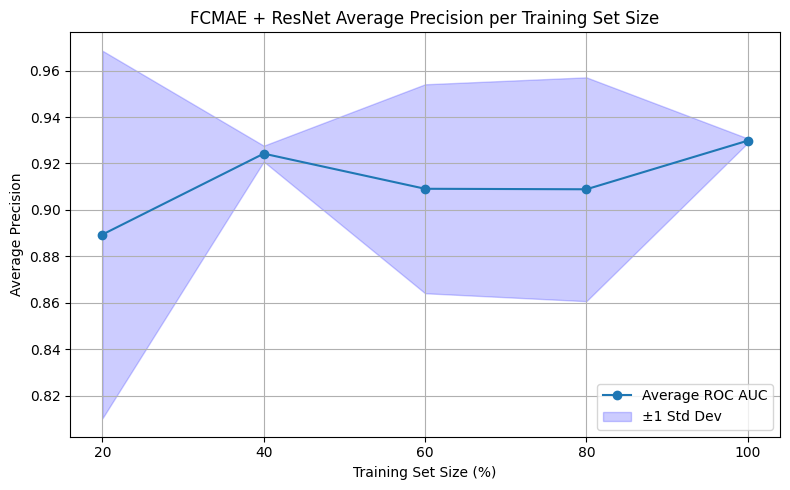

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load results
dataset_name = "resnet_subset_runs.csv"
path = os.path.join(results_path, dataset_name)
df = pd.read_csv(path)

metrics = ["accuracy", "precision", "recall", "f1", "average_precision", "roc_auc"]

print("\nSummary Statistics by Data Subset:")
for metric in metrics:
    print(f"\n--- {metric.upper()} ---")
    stats = df.groupby("data_subset")[metric].agg(['mean', 'std']).reset_index()
    print(stats.to_string(index=False))



# Group by subset and calculate mean and std
grouped = df.groupby('data_subset')['average_precision'].agg(['mean', 'std']).reset_index()

# grouped = df.groupby('data_subset')['precision'].agg(['mean', 'std']).reset_index()


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(grouped['data_subset'], grouped['mean'], marker='o', label='Average ROC AUC')
plt.fill_between(grouped['data_subset'],
                 grouped['mean'] - grouped['std'],
                 grouped['mean'] + grouped['std'],
                 color='blue', alpha=0.2, label='±1 Std Dev')

plt.xticks(grouped['data_subset'])
plt.xlabel("Training Set Size (%)")
plt.ylabel("Average Precision")
plt.title("FCMAE + ResNet Average Precision per Training Set Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


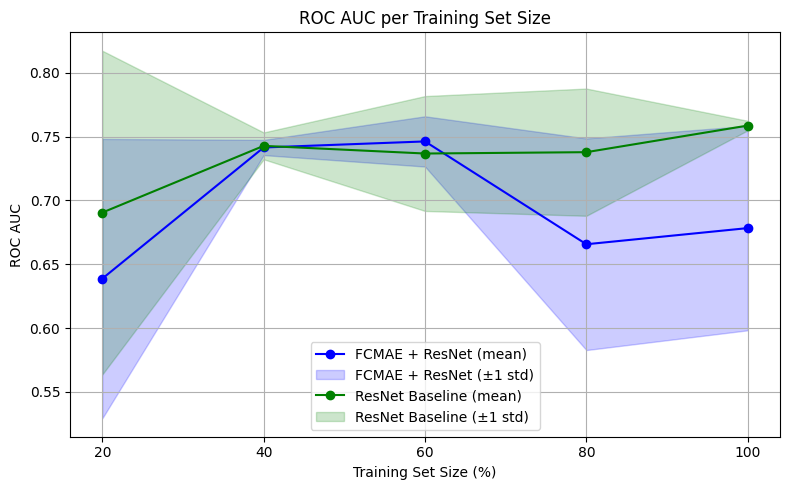

In [19]:
# Plotting both lines in one figure
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define input files
# results_path = "your/results/path"  # <- replace with your actual path
datasets = {
    "FCMAE + ResNet": "FCMAE_resnet_subset_runs.csv",
    "ResNet Baseline": "resnet_subset_runs.csv"
}

# Define plotting colors
colors = {
    "FCMAE + ResNet": "blue",
    "ResNet Baseline": "green"
}

plt.figure(figsize=(8, 5))

for label, dataset_name in datasets.items():
    path = os.path.join(results_path, dataset_name)

    # Load CSV
    # if dataset_name == "FCMAE_resnet_subset_runs.csv":
    #     column_names = ["run", "data_subset", "accuracy", "precision", "recall", "f1", "average_precision", "roc_auc"]
    #     df = pd.read_csv(path, header=None, names=column_names)
    # else:
    #     df = pd.read_csv(path)
    df = pd.read_csv(path)
    # Compute mean and std of ROC AUC
    grouped = df.groupby('data_subset')['roc_auc'].agg(['mean', 'std']).reset_index()

    # Plot with shaded std region
    plt.plot(grouped['data_subset'], grouped['mean'], marker='o', label=f'{label} (mean)', color=colors[label])
    plt.fill_between(grouped['data_subset'],
                     grouped['mean'] - grouped['std'],
                     grouped['mean'] + grouped['std'],
                     alpha=0.2, color=colors[label], label=f'{label} (±1 std)')

# Plot aesthetics
plt.xticks(grouped['data_subset'])
plt.xlabel("Training Set Size (%)")
plt.ylabel("ROC AUC")
plt.title("ROC AUC per Training Set Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()







/home/nwertheim/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


best trial FrozenTrial(number=15, state=1, values=[0.7697020327963008], datetime_start=datetime.datetime(2025, 5, 16, 9, 37, 31, 201289), datetime_complete=datetime.datetime(2025, 5, 16, 9, 42, 9, 905132), params={'lr': 7.438874282336107e-07, 'batch_size': 16, 'optimizer': 'Adam'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lr': FloatDistribution(high=1e-06, log=True, low=1e-07, step=None), 'batch_size': CategoricalDistribution(choices=(16, 32, 64)), 'optimizer': CategoricalDistribution(choices=('SGD', 'Adam'))}, trial_id=15, value=None)


/scratch-local/nwertheim.11938421/ipykernel_1201245/2119701894.py:8: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


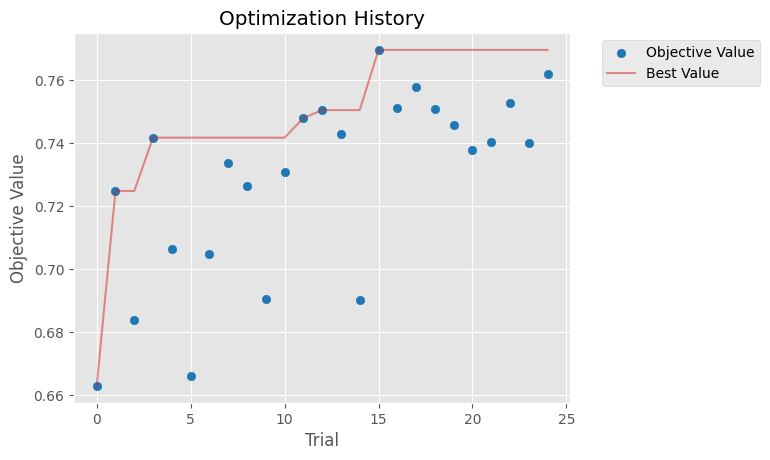

/scratch-local/nwertheim.11938421/ipykernel_1201245/2119701894.py:14: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


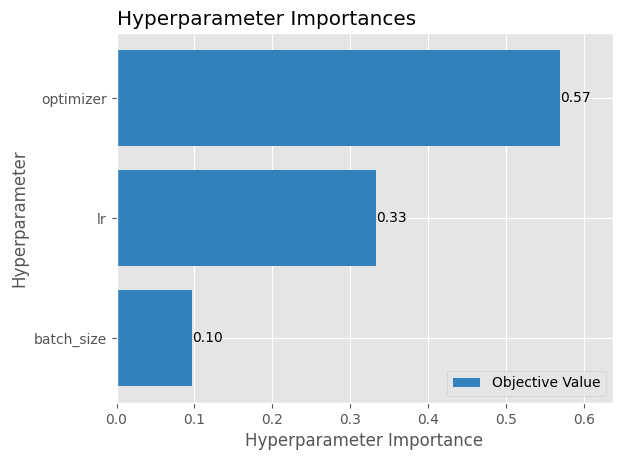

/scratch-local/nwertheim.11938421/ipykernel_1201245/2119701894.py:20: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_parallel_coordinate(study)


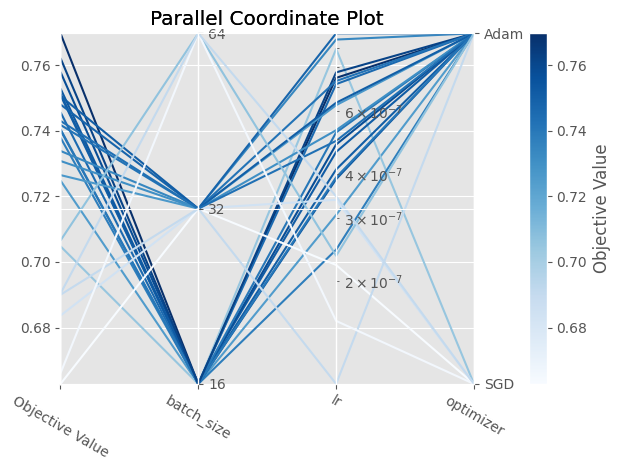

In [11]:
import optuna
import joblib  # or use pickle
path = os.path.join(models_path,  "ResNet_tune_60.pkl")
# Load the study
study = joblib.load(path)
print('best trial', study.best_trial)
# Plot: Optimization History
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optimization History")
# plt.tight_layout()
plt.show()

# Plot: Hyperparameter Importance
optuna.visualization.matplotlib.plot_param_importances(study)
# plt.title("Hyperparameter Importance")
# plt.tight_layout()
plt.show()

# Plot: Parallel Coordinates (shows interaction between parameters)
optuna.visualization.matplotlib.plot_parallel_coordinate(study)
plt.title("Parallel Coordinate Plot")
plt.tight_layout()
plt.show()

In [3]:
import os
import joblib
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_parallel_coordinate
import matplotlib.pyplot as plt






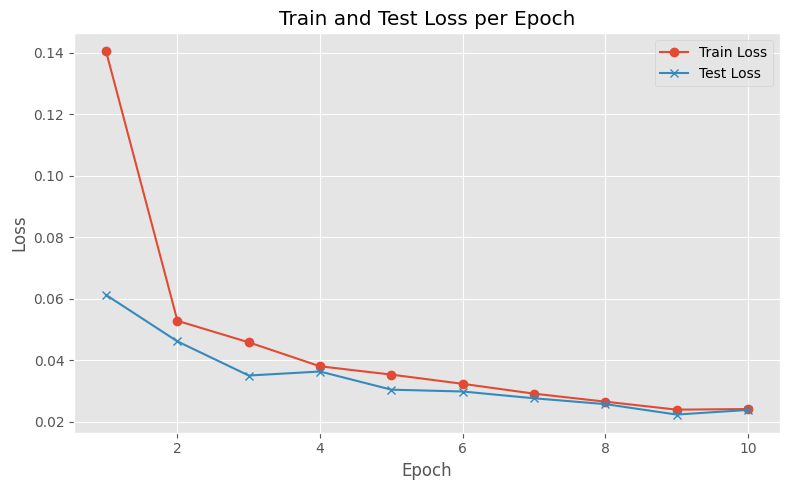

In [4]:
train_losses = [0.1404, 0.0528, 0.0458, 0.0380, 0.0353, 0.0323, 0.0291, 0.0265, 0.0239, 0.0241]
test_losses  = [0.0612, 0.0461, 0.0350, 0.0363, 0.0304, 0.0298, 0.0276, 0.0257, 0.0223, 0.0238]
num_epochs = 10
# Plotting after training
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Test Loss per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse the data from the file
def parse_optuna_results(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            # Use regex to extract the trial information
            match = re.match(
                r"Trial (\d+): learning_rate=(\S+), batch_size=(\d+), masking_ratio=(\S+), num_layers=(\d+), hidden_dim=(\d+), validation_loss=(\S+)", line)
            if match:
                trial, learning_rate, batch_size, masking_ratio, num_layers, hidden_dim, validation_loss = match.groups()
                # Append parsed data as a dictionary
                data.append({
                    "trial": int(trial),
                    "learning_rate": float(learning_rate),
                    "batch_size": int(batch_size),
                    "masking_ratio": float(masking_ratio),
                    "num_layers": int(num_layers),
                    "hidden_dim": int(hidden_dim),
                    "validation_loss": float(validation_loss)
                })
    return data

# Path to your optuna results file
file_path = "optuna_results.txt"

# Parse the results from the file
data = parse_optuna_results(file_path)

# Create DataFrame
df = pd.DataFrame(data)

# Plot Optimization History (Validation Loss vs. Trial Number)
plt.figure(figsize=(10, 6))
plt.plot(df["trial"], df["validation_loss"], marker='o', linestyle='-', color='b')
plt.xlabel("Trial")
plt.ylabel("Validation Loss")
plt.title("LSTM Autoencoder Optimization History")
plt.grid(True)
plt.show()

# Plot the distribution of hyperparameters
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Learning Rate distribution
sns.histplot(df["learning_rate"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Learning Rate Distribution")

# Plot Batch Size distribution
sns.histplot(df["batch_size"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Batch Size Distribution")

# Plot Masking Ratio distribution
sns.histplot(df["masking_ratio"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Masking Ratio Distribution")

# Plot Num Layers distribution
sns.histplot(df["num_layers"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Num Layers Distribution")

plt.tight_layout()
plt.show()

# You can also use seaborn to visualize hyperparameter importance with pairplot
sns.pairplot(df[["learning_rate", "batch_size", "masking_ratio", "num_layers", "validation_loss"]])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'optuna_results.txt'

In [ ]:
# # Load the preprocessed dataset
# save_path = os.path.join(processed_data_path, 'target_preprocessed.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[16]
# print(first_instance)
# signal = first_instance['signal']
# record_name = first_instance['record_name']
# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()

In [ ]:
# # Load the preprocessed dataset
# save_path = os.path.join(raw_data_path, 'target_data.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[11]
# print(first_instance)
# signal = first_instance['signal']
# record_name = first_instance['record_name']

# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()

In [ ]:
# # Load the preprocessed dataset
# save_path = os.path.join(processed_data_path, 'trimmed_target.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[6]
# print(first_instance)
# signal = first_instance['signal']
# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()